In [78]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
print('hi')

hi


In [73]:
#Loading Dataset
df=pd.read_csv(r"C:\Users\Junaid\Downloads\data.csv") 



In [74]:
df.head()# getting first 5 records


,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [89]:
p=pd.read_csv(r"C:\Users\Junaid\Downloads\predict.csv") #Loading Predict dataset
p.drop('index',axis=1,inplace=True)

In [90]:
p.head()

,date,campaign,adgroup,ad,cost
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01


# EDA on Df, (Training)
Identification of Datatypes

In [6]:
df.dtypes

date            object
campaign        object
adgroup         object
ad              object
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
dtype: object

In [7]:
# To change Datatype pf date to datetime
df['date']=pd.to_datetime(df['date'])

In [8]:
df.dtypes

date           datetime64[ns]
campaign               object
adgroup                object
ad                     object
impressions             int64
clicks                  int64
cost                  float64
conversions             int64
revenue               float64
dtype: object

In [9]:
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


# NUll Values

In [10]:
# Checking for NUll Values and Missing Values in Dataset
df.isnull()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4566,False,False,False,False,False,False,False,False,False
4567,False,False,False,False,False,False,False,False,False
4568,False,False,False,False,False,False,False,False,False
4569,False,False,False,False,False,False,False,False,False


In [11]:
#Getting sum of all null values if present.
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [12]:
#SO as per given dataset  the dataset does not contain any NULL Values



In [13]:
#using describe funtion to get all mean, standard ,min, max of dataset
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [79]:
df['campaign'].unique()

array(['campaign 1'], dtype=object)

In [80]:
for col in df:
    print(col)
    print(df[col].unique())

date
['01-08-2020' '02-08-2020' '03-08-2020' '04-08-2020' '05-08-2020'
 '06-08-2020' '07-08-2020' '08-08-2020' '09-08-2020' '10-08-2020'
 '11-08-2020' '12-08-2020' '13-08-2020' '14-08-2020' '15-08-2020'
 '16-08-2020' '17-08-2020' '18-08-2020' '19-08-2020' '20-08-2020'
 '21-08-2020' '22-08-2020' '23-08-2020' '24-08-2020' '25-08-2020'
 '26-08-2020' '27-08-2020' '28-08-2020' '29-08-2020' '30-08-2020'
 '31-08-2020' '01-09-2020' '02-09-2020' '03-09-2020' '04-09-2020'
 '05-09-2020' '06-09-2020' '07-09-2020' '08-09-2020' '09-09-2020'
 '10-09-2020' '11-09-2020' '12-09-2020' '13-09-2020' '14-09-2020'
 '15-09-2020' '16-09-2020' '17-09-2020' '18-09-2020' '19-09-2020'
 '20-09-2020' '21-09-2020' '22-09-2020' '23-09-2020' '24-09-2020'
 '25-09-2020' '26-09-2020' '27-09-2020' '28-09-2020' '29-09-2020'
 '30-09-2020' '01-10-2020' '02-10-2020' '03-10-2020' '04-10-2020'
 '05-10-2020' '06-10-2020' '07-10-2020' '08-10-2020' '09-10-2020'
 '10-10-2020' '11-10-2020' '12-10-2020' '13-10-2020' '14-10-2020'
 '15-

In [19]:
df

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
4566,2021-02-28,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
4567,2021-02-28,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
4568,2021-02-28,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20
4569,2021-02-28,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00


# Non_Graphical Univariate Analysis us valu_counts()

In [20]:
df['campaign'].value_counts()

campaign 1    4571
Name: campaign, dtype: int64

In [21]:
df['ad'].value_counts()

ad 3     617
ad 1     587
ad 2     512
ad 7     461
ad 32    377
        ... 
ad 47      4
ad 36      4
ad 24      4
ad 69      4
ad 51      3
Name: ad, Length: 70, dtype: int64

In [22]:
df['impressions'].value_counts()


1       390
2       258
3       198
5       157
6       150
       ... 
226       1
234       1
254       1
274       1
2023      1
Name: impressions, Length: 571, dtype: int64

In [23]:
df['clicks'].value_counts()

1       464
0       444
2       351
4       252
3       246
       ... 
809       1
797       1
761       1
713       1
1177      1
Name: clicks, Length: 355, dtype: int64

In [24]:
df['cost'].value_counts()

0.00     444
0.01     262
0.02     193
0.03     142
0.04     131
        ... 
15.25      1
10.50      1
4.25       1
5.25       1
33.62      1
Name: cost, Length: 810, dtype: int64

In [25]:
df['conversions'].value_counts()

0     3213
1      542
2      234
3      117
4      105
6       79
5       76
7       48
9       35
8       28
10      11
12       7
11       7
14       7
23       6
19       5
13       4
15       3
22       3
27       3
18       3
17       3
16       2
36       2
82       2
40       2
47       2
26       1
52       1
71       1
63       1
94       1
24       1
28       1
44       1
48       1
68       1
56       1
34       1
59       1
43       1
74       1
37       1
61       1
85       1
39       1
42       1
79       1
91       1
Name: conversions, dtype: int64

In [26]:
df['revenue'].value_counts()

0.00      3216
52.00        8
54.00        8
65.00        6
94.00        5
          ... 
194.72       1
383.00       1
111.88       1
177.41       1
669.32       1
Name: revenue, Length: 1223, dtype: int64

# Performing Graphical Univariate Analysys for colums

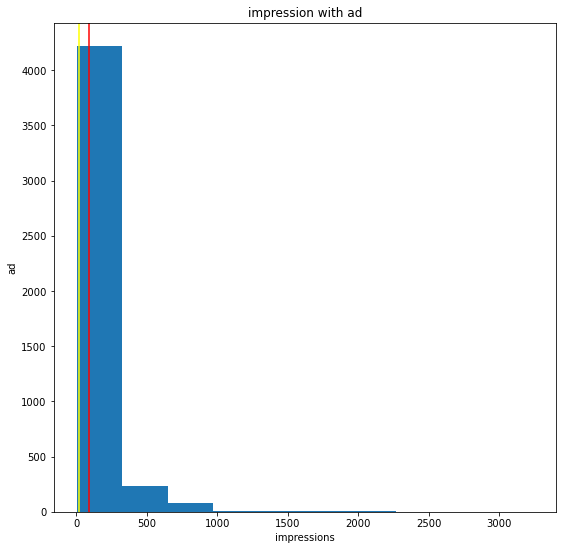

In [27]:
# check impressions 
plt.figure(figsize=(9,9))
plt.hist(df["impressions"],bins=10)
plt.title("impression with ad")
plt.axvline(df["impressions"].mean(),color="red")
plt.axvline(df["impressions"].median(),color="yellow")
plt.ylabel("ad")
plt.xlabel("impressions")
plt.show()

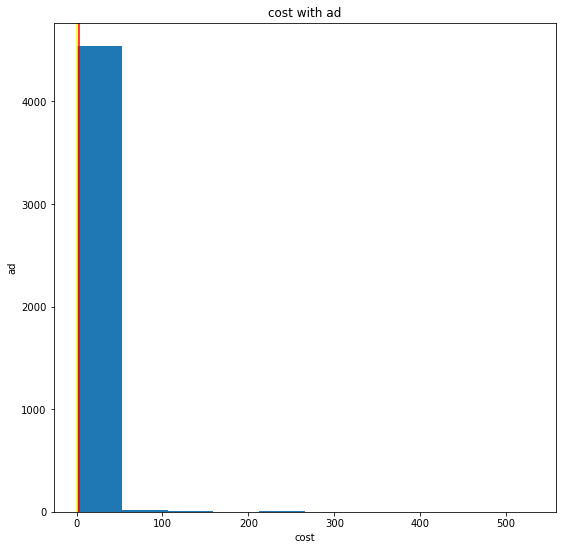

In [28]:
# check cost 
plt.figure(figsize=(9,9))
plt.hist(df["cost"],bins=10)
plt.title("cost with ad")
plt.axvline(df["cost"].mean(),color="red")
plt.axvline(df["cost"].median(),color="yellow")
plt.ylabel("ad")
plt.xlabel("cost")
plt.show()

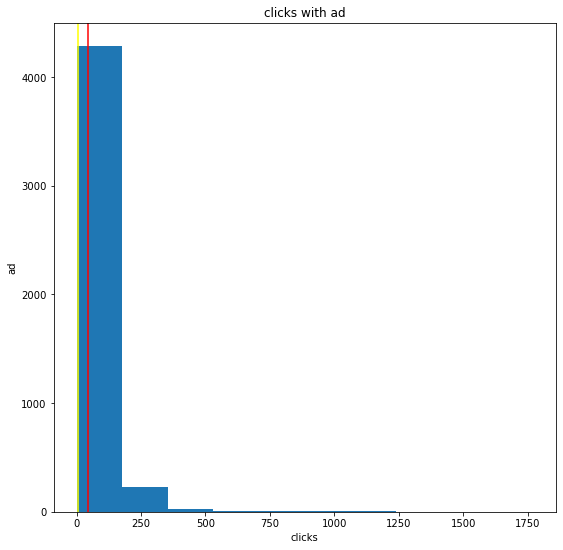

In [29]:
# check clicks 
plt.figure(figsize=(9,9))
plt.hist(df["clicks"],bins=10)
plt.title("clicks with ad")
plt.axvline(df["clicks"].mean(),color="red")
plt.axvline(df["clicks"].median(),color="yellow")
plt.ylabel("ad")
plt.xlabel("clicks")
plt.show()

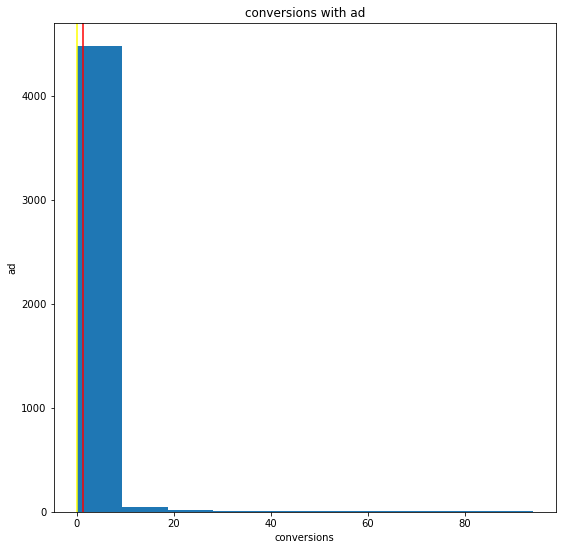

In [30]:
# check convertions 
plt.figure(figsize=(9,9))
plt.hist(df["conversions"],bins=10)
plt.title("conversions with ad")
plt.axvline(df["conversions"].mean(),color="red")
plt.axvline(df["conversions"].median(),color="yellow")
plt.ylabel("ad")
plt.xlabel("conversions")
plt.show()

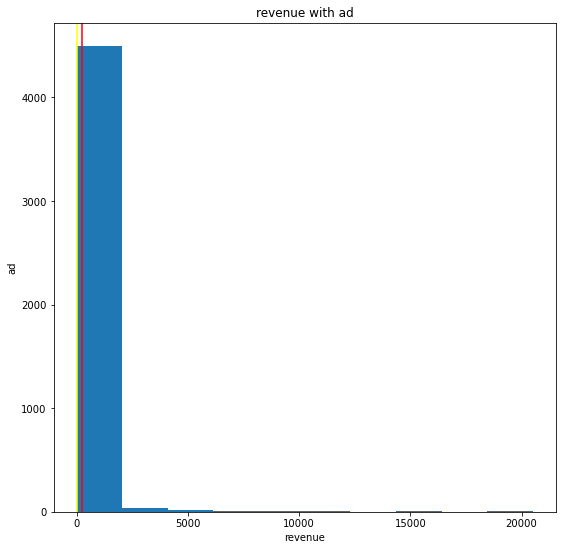

In [31]:
# check Revenue 
plt.figure(figsize=(9,9))
plt.hist(df["revenue"],bins=10)
plt.title("revenue with ad")
plt.axvline(df["revenue"].mean(),color="red")
plt.axvline(df["revenue"].median(),color="yellow")
plt.ylabel("ad")
plt.xlabel("revenue")
plt.show()

# Performing BiVariate Analysis using iplot cufflinks 

In [32]:
import cufflinks as cf
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,plot,iplot 
import mpl_toolkits
from mpl_toolkits import mplot3d
plt.rcParams['figure.figsize']=17,7
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)
cf.go_offline()


# when you hover cursor  on bar on graph ,we can see 'date' in plotly with other many functions¶

In [33]:
df.iplot(kind='bar',x='impressions',y='date')

#this ilpot funtion gives visualizing data in  more attractive way


In [34]:
df.iplot(kind='bar',x='clicks',y='date')

#this ilpot funtion gives visualizing data in  more attractive way

In [35]:
df.iplot(kind='bar',x='cost',y='date')

In [36]:
df.iplot(kind='bar',x='revenue',y='date')

In [37]:
df.iplot(kind='bar',x='conversions',y='date')

# EDA On DF, Training

In [81]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes('object')

In [82]:
df_cat.columns

Index(['date', 'campaign', 'adgroup', 'ad'], dtype='object')

In [86]:
for col in df_cat.columns: 
    l=LabelEncoder()
    df_cat[col]=l.fit_transform(df_cat[col])


In [87]:
df_cat

,date,campaign,adgroup,ad
0,2,0,0,0
1,2,0,1,0
2,2,0,2,0
3,2,0,3,0
4,2,0,0,11
...,...,...,...,...
4566,190,0,2,50
4567,190,0,3,50
4568,190,0,2,51
4569,190,0,0,51


In [88]:
df2=pd.concat([df_cat,df_num],axis=1)
df2

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,0,24,6,0.08,0,0.00
1,2,0,1,0,1,0,0.00,0,0.00
2,2,0,2,0,13,4,0.04,0,0.00
3,2,0,3,0,5,4,0.08,0,0.00
4,2,0,0,11,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
4566,190,0,2,50,19,6,0.07,0,0.00
4567,190,0,3,50,1,0,0.00,0,0.00
4568,190,0,2,51,16,8,0.12,1,93.20
4569,190,0,0,51,37,13,0.23,0,0.00


# EDA on P (Testing)

In [91]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      318 non-null    object 
 1   campaign  318 non-null    object 
 2   adgroup   318 non-null    object 
 3   ad        318 non-null    object 
 4   cost      318 non-null    float64
dtypes: float64(1), object(4)
memory usage: 12.5+ KB


In [93]:
p.isnull().sum()

date        0
campaign    0
adgroup     0
ad          0
cost        0
dtype: int64

In [95]:
p['campaign'].unique()

array(['campaign 1'], dtype=object)

In [97]:
for  col  in  p:
    print(col)
    print(p[col].unique())


date
['01-03-2021' '02-03-2021' '03-03-2021' '04-03-2021' '05-03-2021'
 '06-03-2021' '07-03-2021' '08-03-2021' '09-03-2021' '10-03-2021'
 '11-03-2021' '12-03-2021' '13-03-2021' '14-03-2021' '15-03-2021']
campaign
['campaign 1']
adgroup
['adgroup 1' 'adgroup 3' 'adgroup 4' 'adgroup 2']
ad
['ad 1' 'ad 2' 'ad 3' 'ad 4' 'ad 5' 'ad 6' 'ad 7' 'ad 8' 'ad 10' 'ad 71'
 'ad 72' 'ad 73' 'ad 74' 'ad 75' 'ad 56' 'ad 55']
cost
[0.58 0.17 0.05 0.01 0.03 1.67 0.   1.06 0.08 1.64 0.1  0.88 0.02 0.3
 0.16 0.98 0.22 0.24 0.65 1.57 1.65 1.36 0.07 0.99 0.46 0.13 0.04 0.94
 0.12 0.09 0.18 0.34 0.4  0.14 0.25 0.87 0.81 0.06 2.05 0.67 1.69 0.56
 1.59 1.66 1.54 0.91 1.4  0.7  1.07 0.2  0.49 1.94 2.9  0.72 0.32 0.31
 0.27 0.55 0.66 0.61 3.36 2.67 0.45 0.78 0.63 3.53 3.47 0.77 0.47 0.62
 1.49 1.62 1.21 1.03 0.15 0.44 0.9  1.29 1.15 0.21 0.93 0.29 0.37 0.85
 1.16 1.   0.43 1.17 1.27 1.41 0.97 0.19 1.08 1.39 0.26 0.28 0.11 0.73
 1.58 0.41 0.79 0.84 1.73 1.76 0.6  0.48 1.42 0.23 0.33]


# Label Encoding on P (Test) 

In [98]:
p_num=p.select_dtypes(['int64','float64']) 
p_cat=p.select_dtypes('object')

In [100]:
p_cat.columns

Index(['date', 'campaign', 'adgroup', 'ad'], dtype='object')

In [101]:
for col in p_cat.columns: 
    l=LabelEncoder()
    p_cat[col]=l.fit_transform(p_cat[col])

In [102]:
p_cat

,date,campaign,adgroup,ad
0,0,0,0,0
1,0,0,2,0
2,0,0,3,0
3,0,0,1,0
4,0,0,1,2
...,...,...,...,...
313,14,0,3,6
314,14,0,2,6
315,14,0,0,6
316,14,0,2,7


In [104]:
p2=pd.concat([p_num,p_cat],axis=1)
p2

,cost,date,campaign,adgroup,ad
0,0.58,0,0,0,0
1,0.17,0,0,2,0
2,0.05,0,0,3,0
3,0.01,0,0,1,0
4,0.01,0,0,1,2
...,...,...,...,...,...
313,0.01,14,0,3,6
314,0.01,14,0,2,6
315,0.14,14,0,0,6
316,0.06,14,0,2,7


Executing shutdown due to inactivity...


2021-05-13 00:18:04,392 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-05-13 00:18:10,346 - INFO     - Executing shutdown...


In [50]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5 non-null      datetime64[ns]
 1   campaign     5 non-null      int32         
 2   ad           5 non-null      int32         
 3   impressions  5 non-null      int64         
 4   clicks       5 non-null      int64         
 5   cost         5 non-null      float64       
 6   conversions  5 non-null      int64         
 7   revenue      5 non-null      float64       
 8   adgroup 2    5 non-null      float64       
 9   adgroup 3    5 non-null      float64       
 10  adgroup 4    5 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int32(2), int64(3)
memory usage: 528.0 bytes


# Checking Outliers and Treating them on df (train)

In [51]:
# seperate categorical and numeric data becasue in future we need to perform labelencoding on 
# categorical data which is in object or character based datatype 
# and also we need to check outlier on numeric dataset 
df_num=df.select_dtypes(['int64','float64'])

In [52]:
df_num

,impressions,clicks,cost,conversions,revenue,adgroup 2,adgroup 3,adgroup 4
0,24,6,0.08,0,0.00,0.0,0.0,0.0
1,1,0,0.00,0,0.00,1.0,0.0,0.0
2,13,4,0.04,0,0.00,0.0,1.0,0.0
3,5,4,0.08,0,0.00,0.0,0.0,1.0
4,247,126,1.29,4,925.71,0.0,0.0,0.0


# Before Treatment of outliers

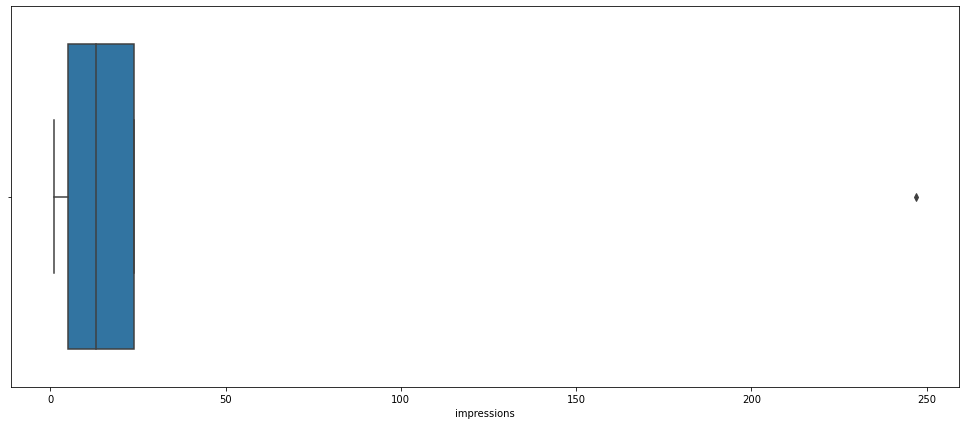

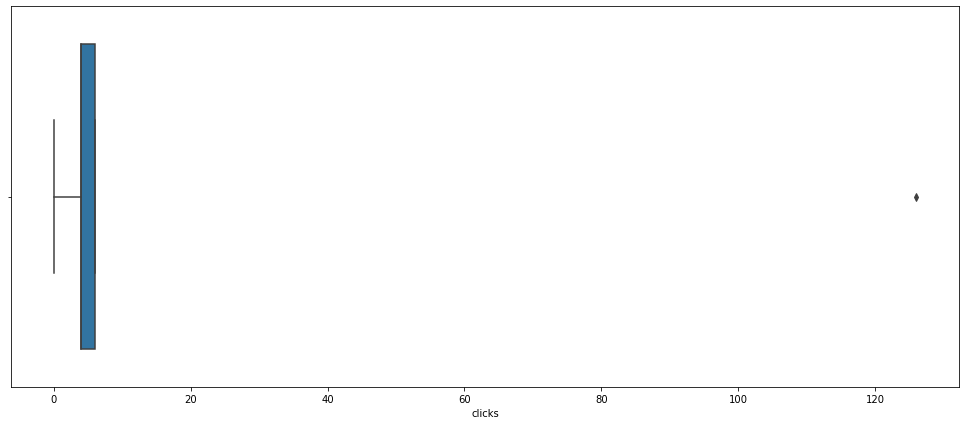

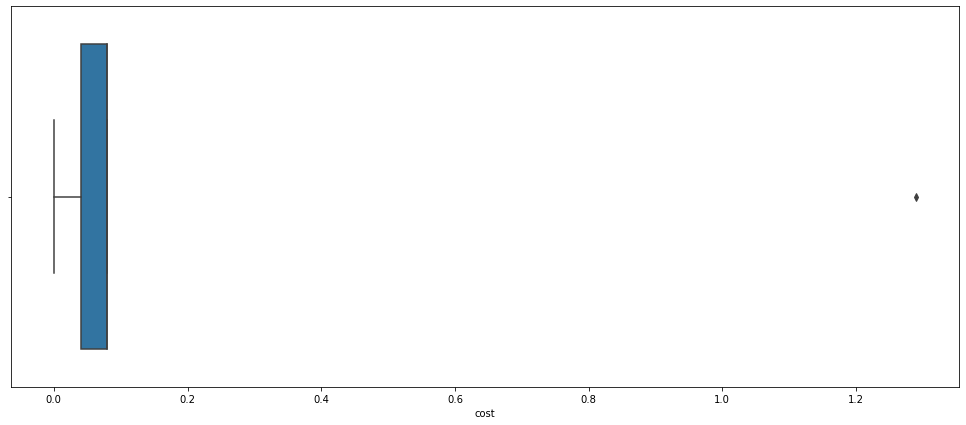

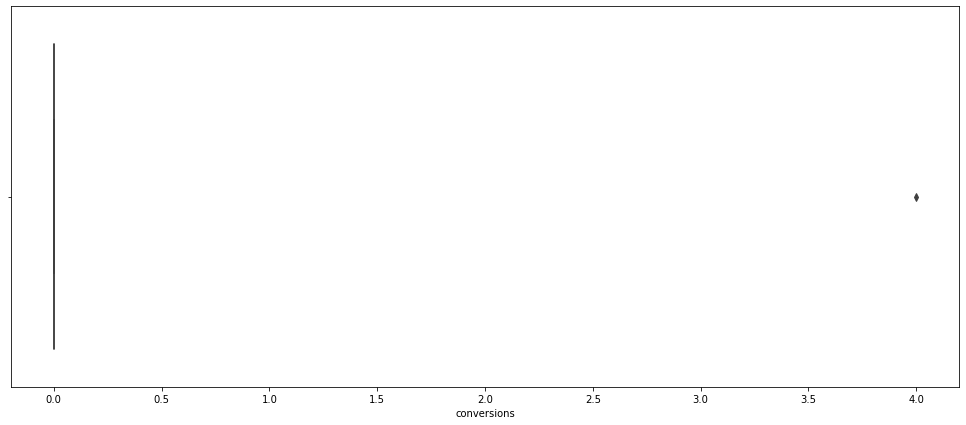

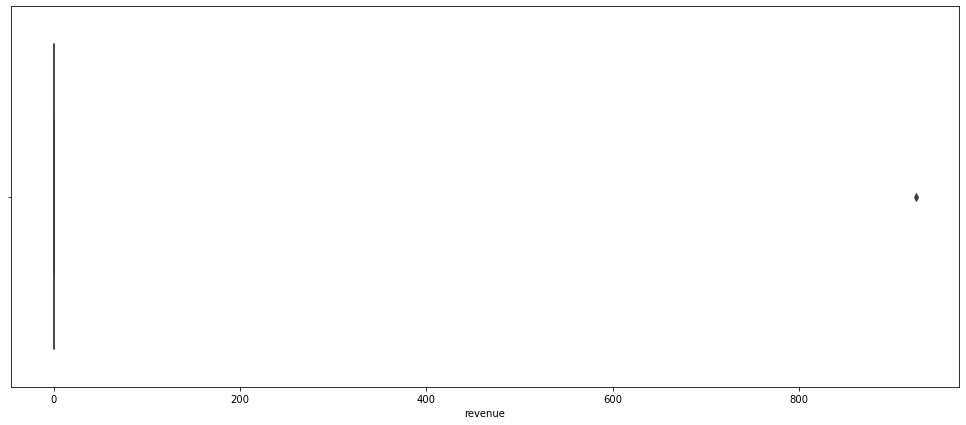

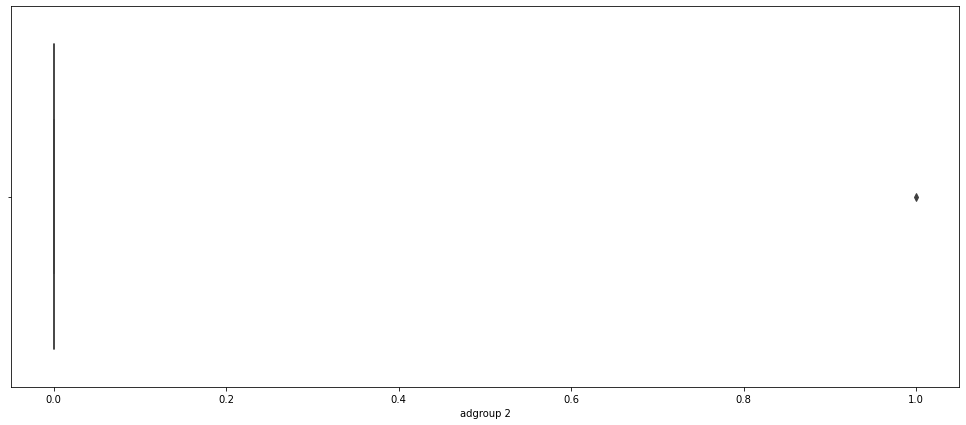

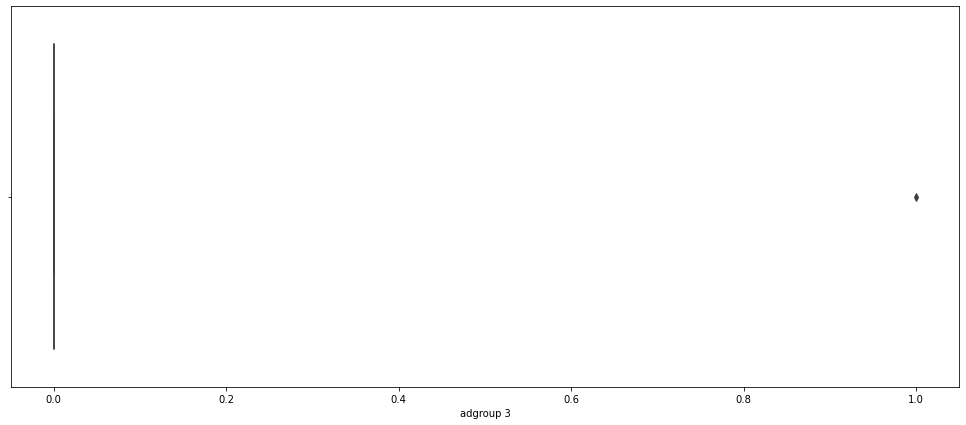

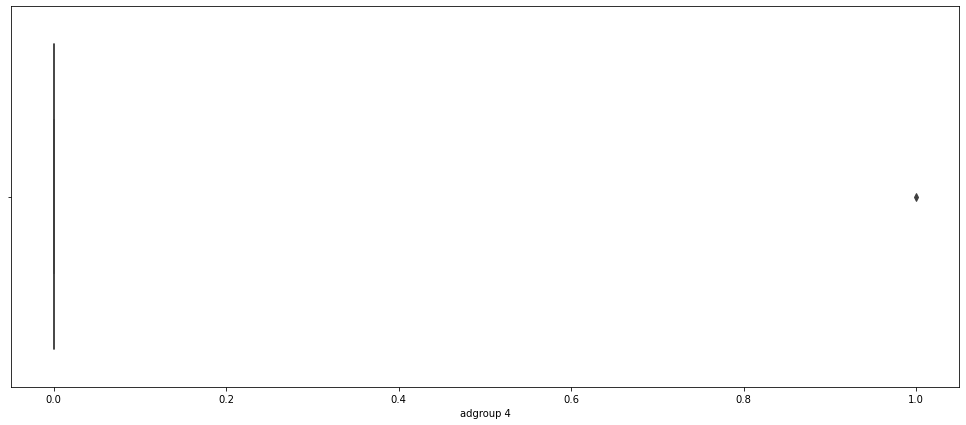

In [53]:
#box plot helps us to analyz outlier in dataset 
# we want to plot boxplot for all numeric columns so either we can go for 
# subplot or we can use loop 
for col in df_num:
    plt.figure()
    # generally we took 1.5 but depends on business requirment accept lower whisker and upper whisker 
    sns.boxplot(data=df_num,x=col,whis=3) 
    plt.show()

In [54]:
# one way to deal with outlier using skew function scipy 
from scipy.stats import skew #explore scipy.states probability,mode,mean,sd,variance
#using skew check how much data are skewd and get rid of skewd data 
for col in df_num:
    print(col,skew(df_num[col]))

impressions 1.4745962339680834
clicks 1.494031839157879
cost 1.4865333557034626
conversions 1.5
revenue 1.5
adgroup 2 1.4999999999999996
adgroup 3 1.4999999999999996
adgroup 4 1.5


impressions 1.4745962339680834


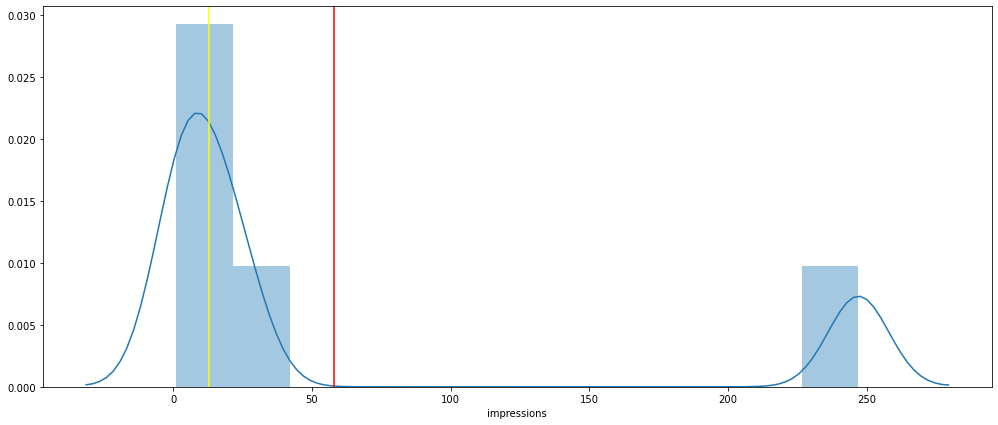

clicks 1.494031839157879


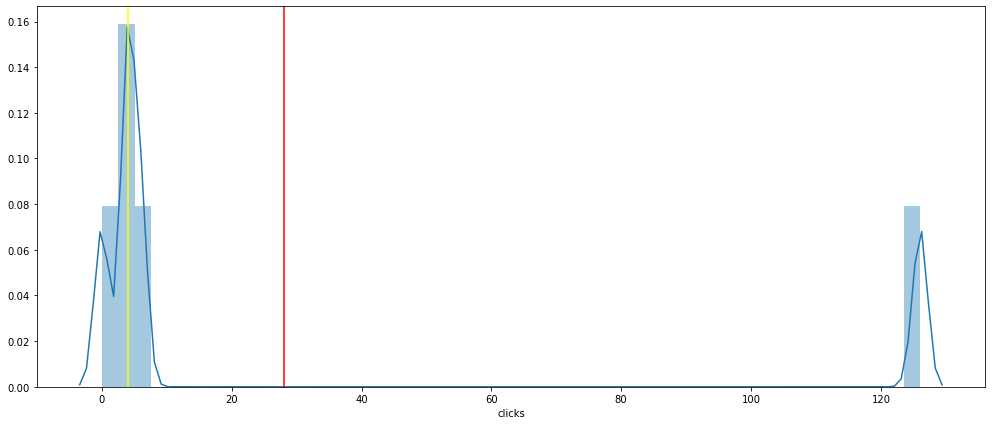

cost 1.4865333557034626


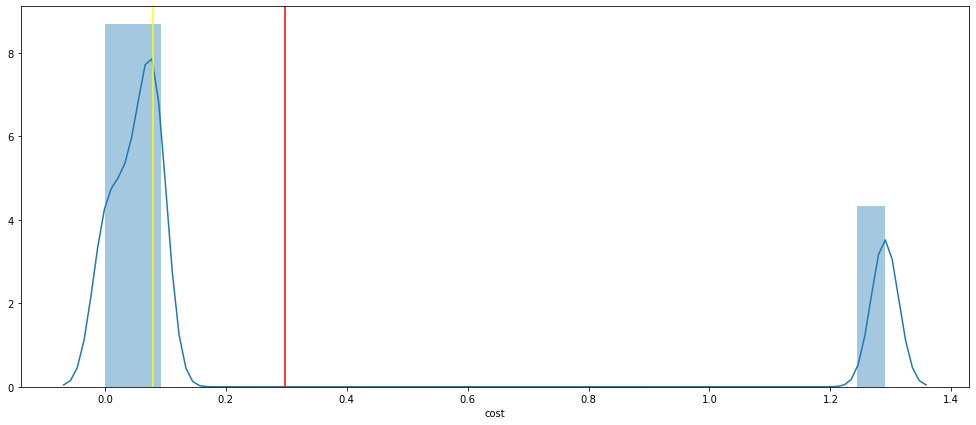

conversions 1.5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



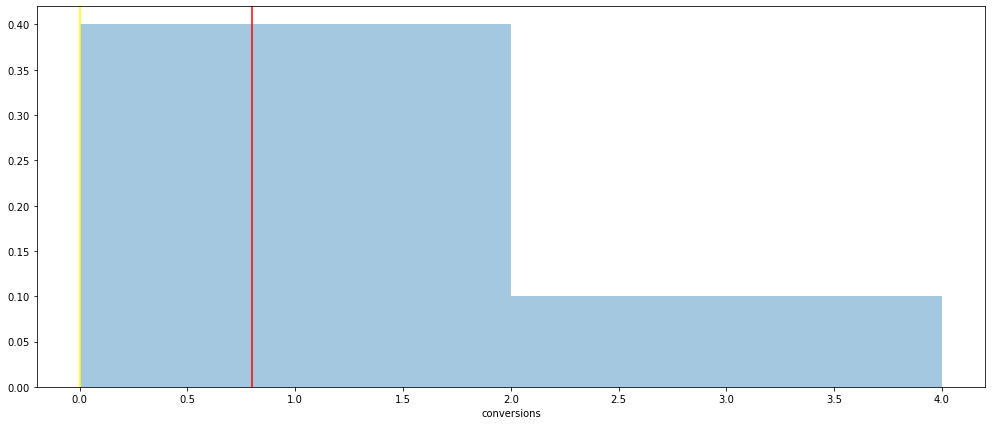

revenue 1.5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



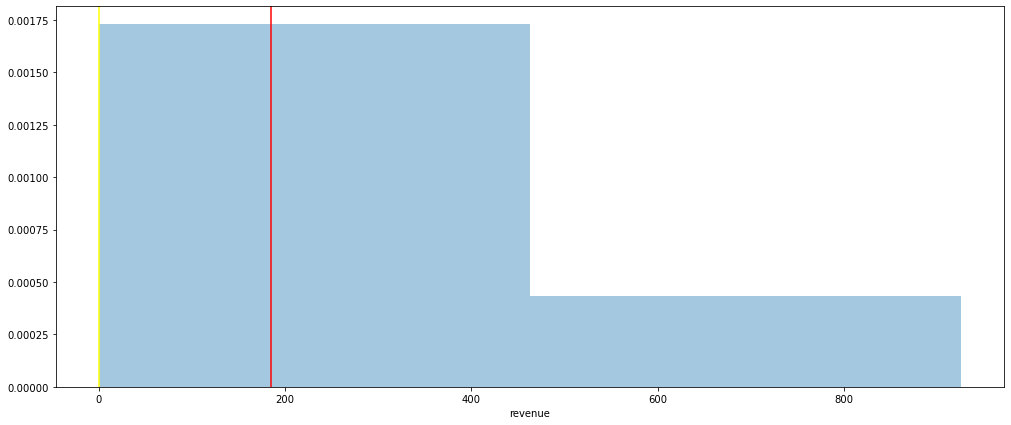

adgroup 2 1.4999999999999996


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



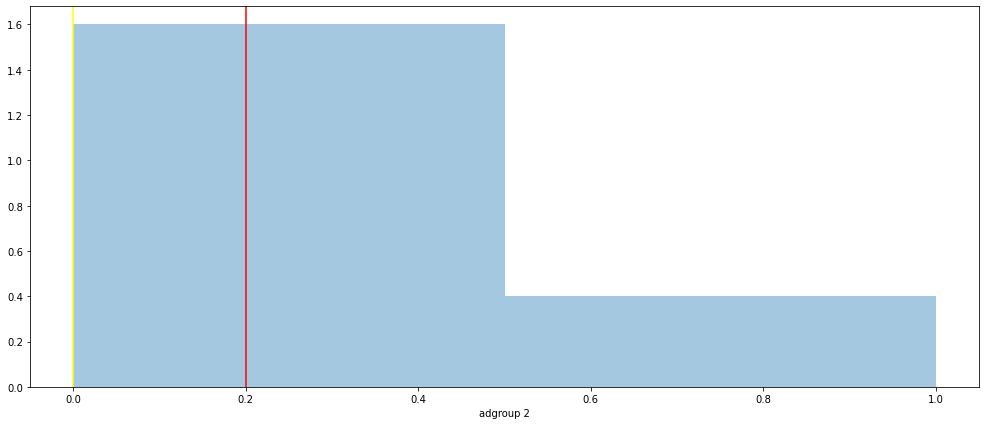

adgroup 3 1.4999999999999996


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



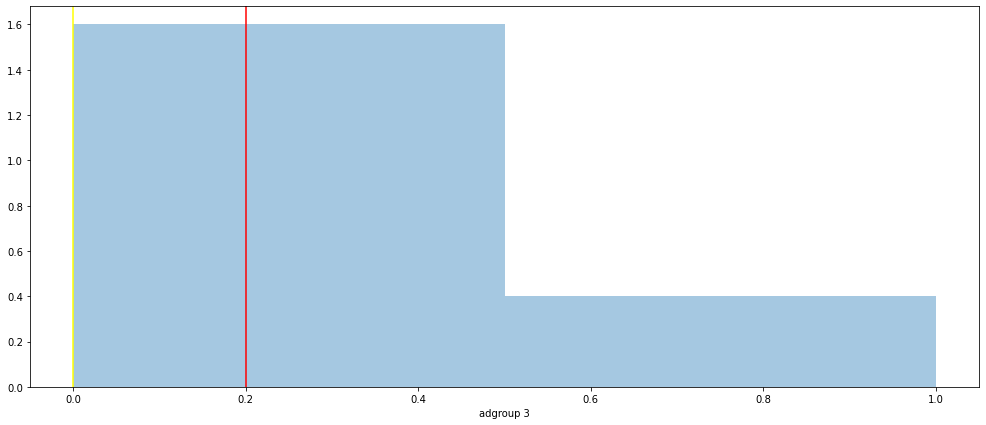

adgroup 4 1.5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



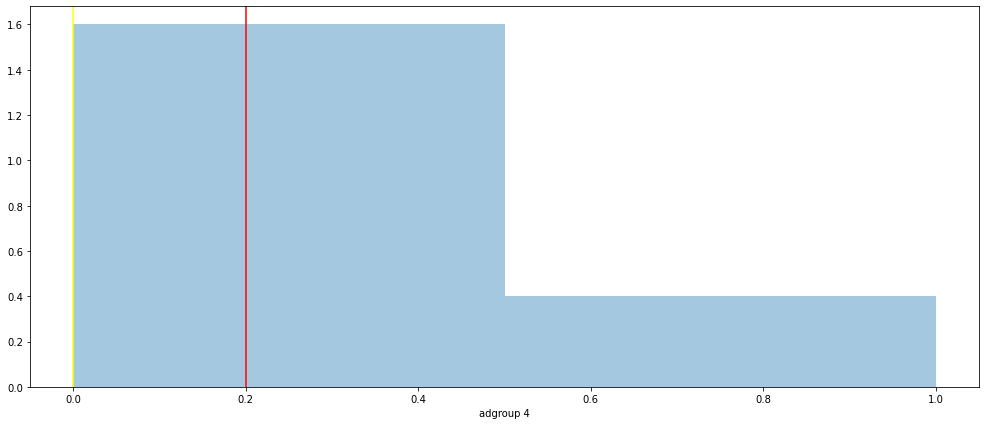

In [55]:
# plot data to check skewness 
for col in df_num:
    print(col,skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.axvline(df[col].mean(),color="red")
    plt.axvline(df[col].median(),color="yellow")
    plt.show()

In [56]:
import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Treating Outliers

In [57]:
for col in df_num:
    if skew(df_num[col]) >= 1 or skew(df_num[col]) <= -1:
        df_num[col] = np.sqrt(df_num[col])
        

# Aftre Treating Outliers

In [58]:
for col in df_num:
    print(col, skew(df[col]))

impressions 1.4745962339680834
clicks 1.494031839157879
cost 1.4865333557034626
conversions 1.5
revenue 1.5
adgroup 2 1.4999999999999996
adgroup 3 1.4999999999999996
adgroup 4 1.5


impressions 1.27538182699987


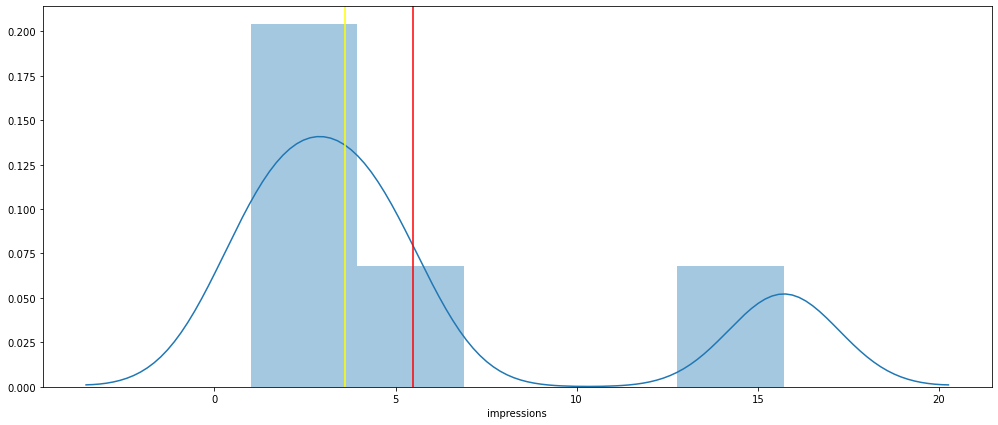

clicks 1.3172400940639701


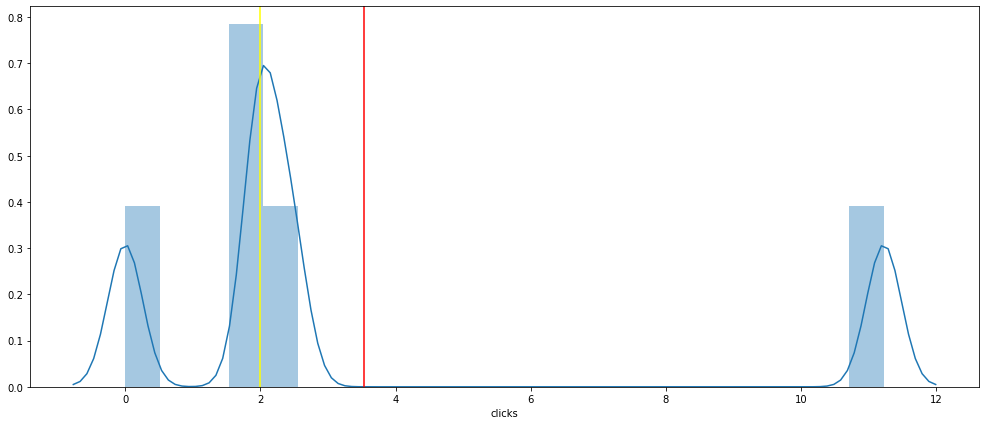

cost 1.2269307077986062


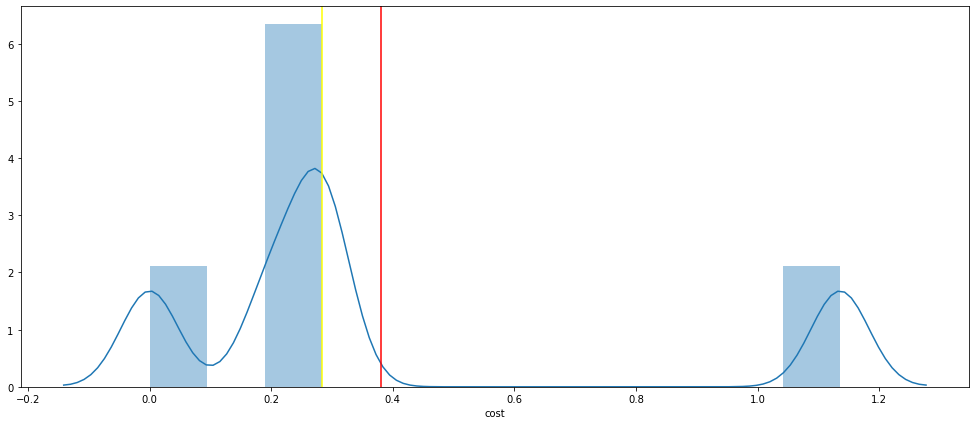

conversions 1.5


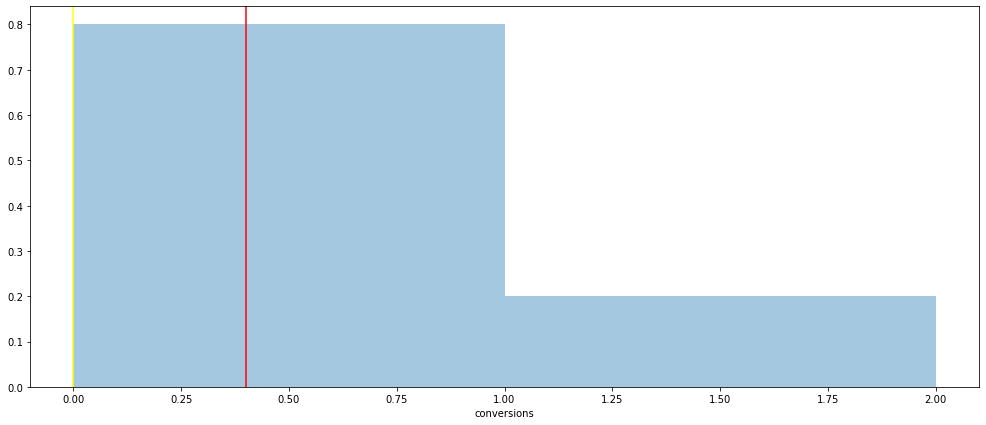

revenue 1.5


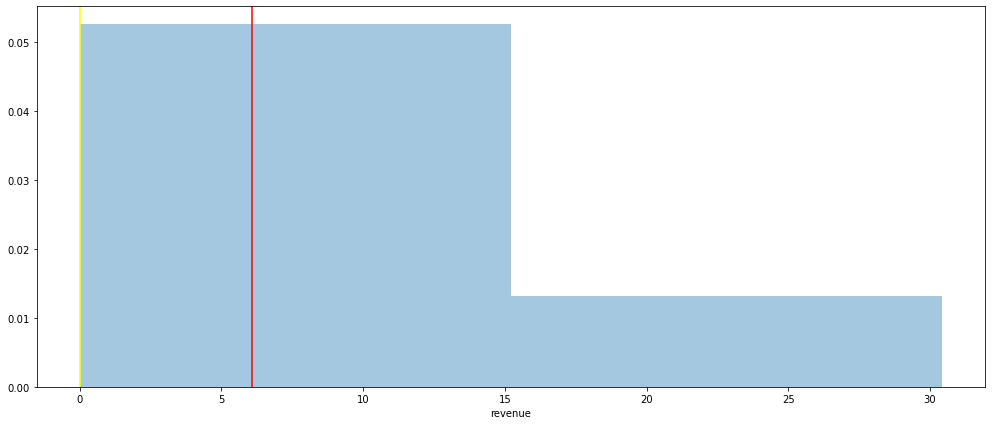

adgroup 2 1.4999999999999996


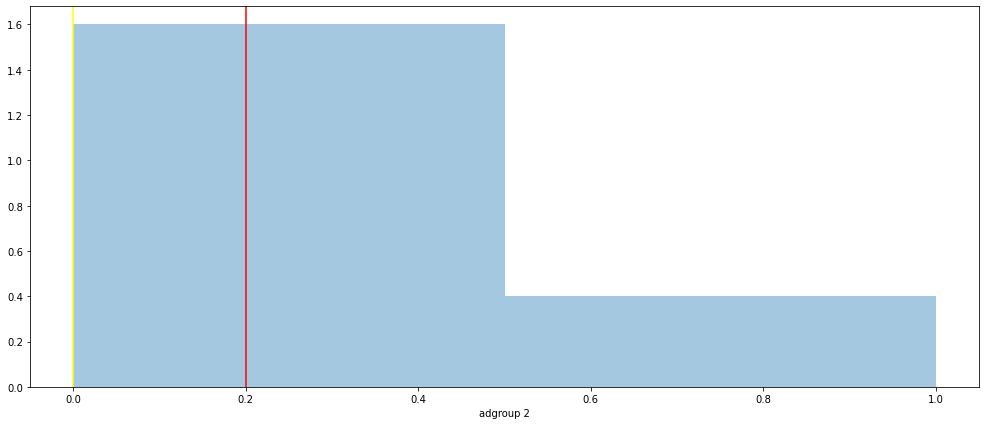

adgroup 3 1.4999999999999996


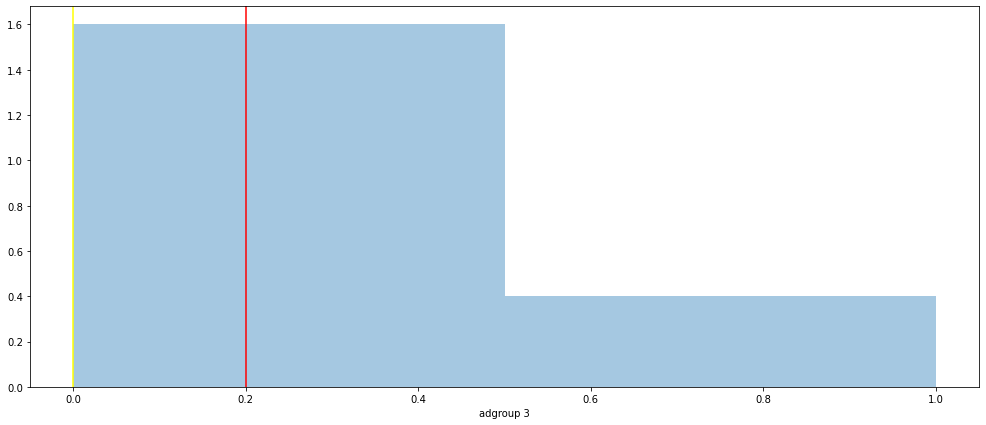

adgroup 4 1.5


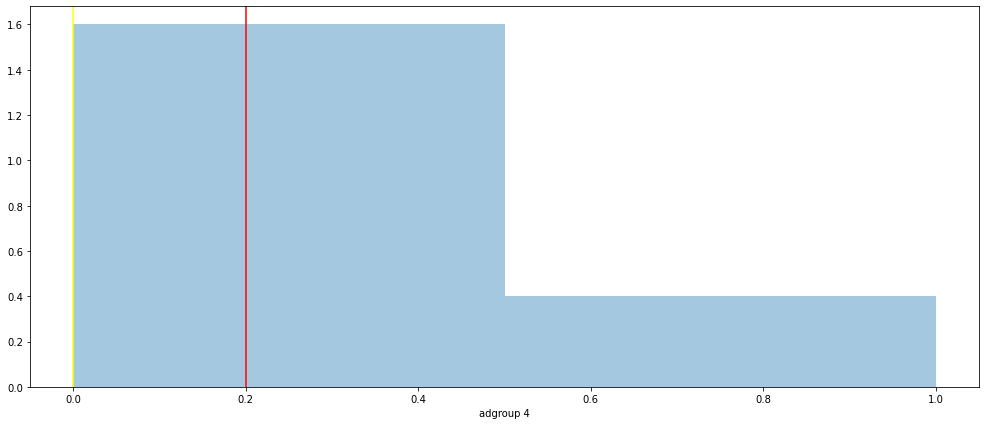

In [59]:
#plot data to check skewness
for col in df_num:
    print(col,skew(df_num[col])) 
    plt.figure() 
    sns.distplot(df_num[col]) 
    plt.axvline(df_num[col].mean(),color="red") 
    plt.axvline(df_num[col].median(),color="yellow") 
    plt.show()

In [60]:
# Now we can see above ,the diffrence in plot after treating the outliers on numercal values

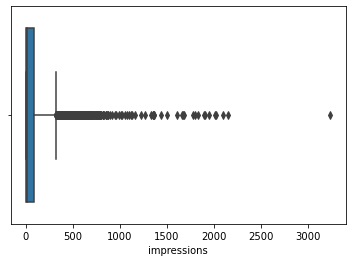

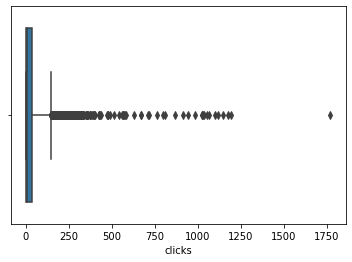

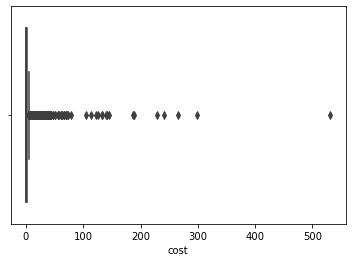

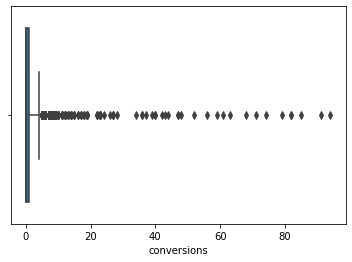

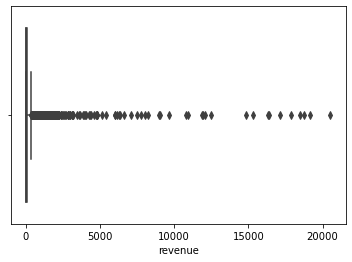

In [107]:
for col in df_num:
    plt.figure()
    # generally we took 1.5 but depends on business requirment accept lower whisker and upper whisker 
    sns.boxplot(data=df_num,x=col,whis=3) 
    plt.show()

In [61]:
df

,date,campaign,ad,impressions,clicks,cost,conversions,revenue,adgroup 2,adgroup 3,adgroup 4
0,2020-01-08,0,0,24,6,0.08,0,0.00,0.0,0.0,0.0
1,2020-01-08,0,0,1,0,0.00,0,0.00,1.0,0.0,0.0
2,2020-01-08,0,0,13,4,0.04,0,0.00,0.0,1.0,0.0
3,2020-01-08,0,0,5,4,0.08,0,0.00,0.0,0.0,1.0
4,2020-01-08,0,1,247,126,1.29,4,925.71,0.0,0.0,0.0


# Checking Outliers and Treating them on p (test)

In [109]:
# seperate categorical and numeric data becasue in future we need to perform labelencoding on 
# categorical data which is in object or character based datatype 
# and also we need to check outlier on numeric dataset 
p_num=df.select_dtypes(['int64','float64'])

In [110]:
p_num

,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71
...,...,...,...,...,...
4566,19,6,0.07,0,0.00
4567,1,0,0.00,0,0.00
4568,16,8,0.12,1,93.20
4569,37,13,0.23,0,0.00


# Before Treating Outliers

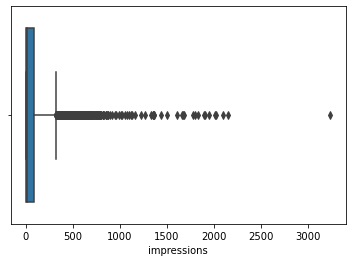

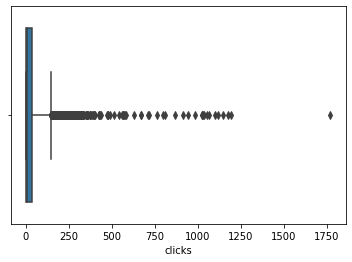

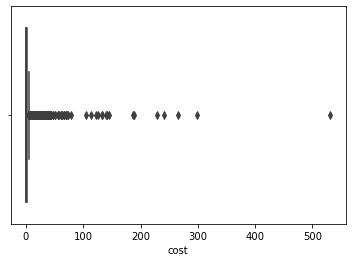

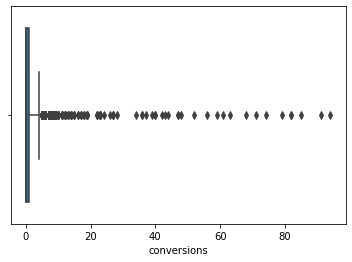

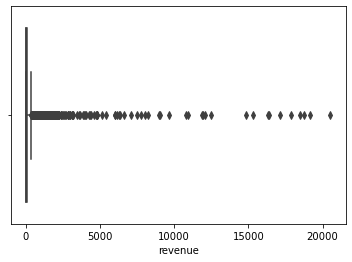

In [111]:
for col in p_num:
    plt.figure()
    # generally we took 1.5 but depends on business requirment accept lower whisker and upper whisker 
    sns.boxplot(data=p_num,x=col,whis=3) 
    plt.show()

In [113]:
# one way to deal with outlier using skew function scipy 
from scipy.stats import skew #explore scipy.states probability,mode,mean,sd,variance
#using skew check how much data are skewd and get rid of skewd data 
for col in p_num:
    print(col,skew(p_num[col]))

impressions 4.943370336249873
clicks 6.106980111178393
cost 18.78075812709375
conversions 10.352286548896624
revenue 11.657937486402515


impressions 1.9450100409815494


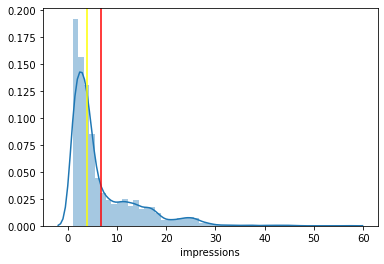

clicks 2.0461563309307143


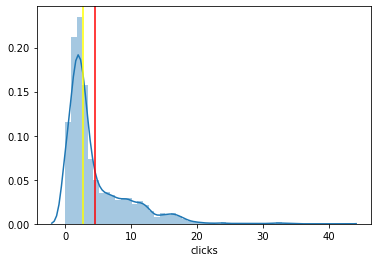

cost 4.737470671322334


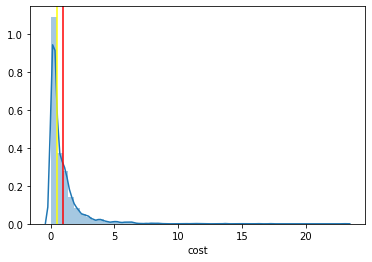

conversions 3.086603566331037


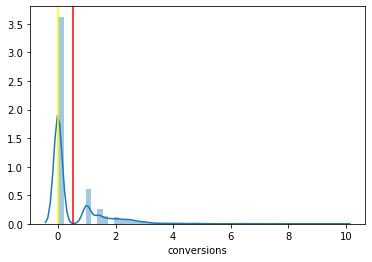

revenue 3.846827181595091


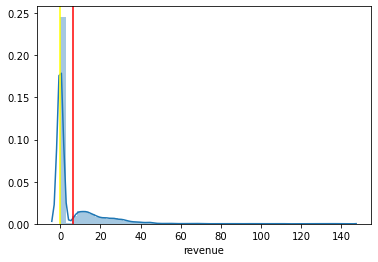

In [117]:
# plot data to check skewness 
for col in p_num:
    print(col,skew(p_num[col]))
    plt.figure()
    sns.distplot(p_num[col])
    plt.axvline(p_num[col].mean(),color="red")
    plt.axvline(p_num[col].median(),color="yellow")
    plt.show()
    
    


In [ ]:
#Treating Outliers

In [121]:
for col in p_num:
    if skew(p_num[col]) >= 1 or skew(p_num[col]) <= -1:
        p_num[col] = np.sqrt(p_num[col])

# After Treating Outliers

In [122]:
for col in p_num:
    print(col, skew(p_num[col]))

impressions 0.6378510182490179
clicks 0.5184839785722556
cost -0.5873043182095327
conversions 0.967886666769451
revenue 0.920281139825345


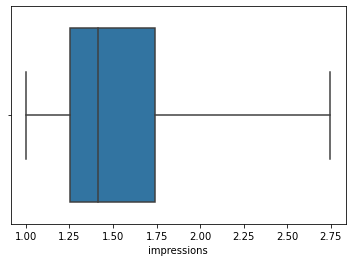

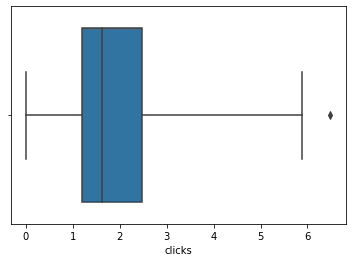

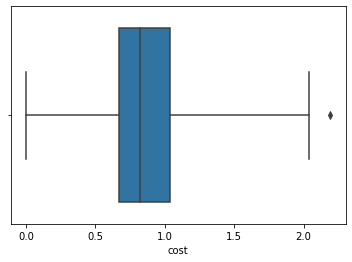

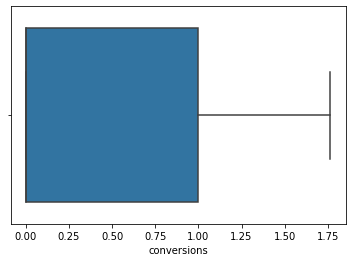

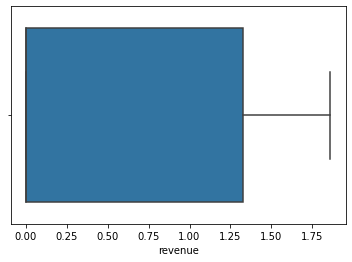

In [123]:
for col in p_num:
    plt.figure()
    # generally we took 1.5 but depends on business requirment accept lower whisker and upper whisker 
    sns.boxplot(data=p_num,x=col,whis=3) 
    plt.show()

impressions 0.6378510182490179


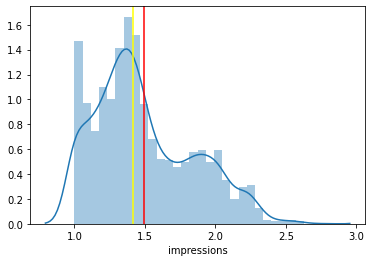

clicks 0.5184839785722556


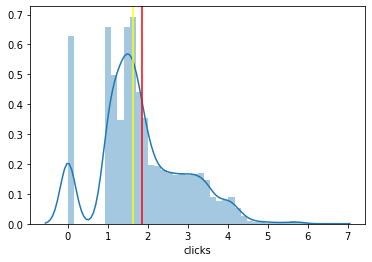

cost -0.5873043182095327


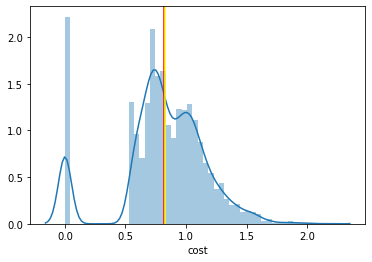

conversions 0.967886666769451


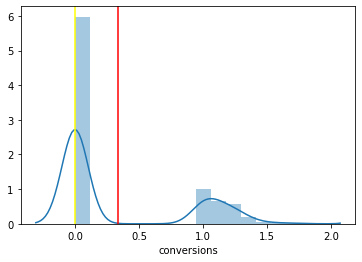

revenue 0.920281139825345


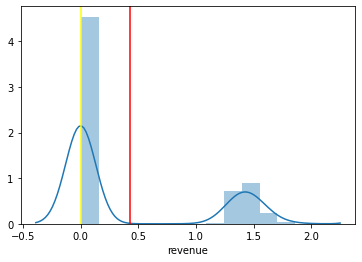

In [124]:
# plot data to check skewness 
for col in p_num:
    print(col,skew(p_num[col]))
    plt.figure()
    sns.distplot(p_num[col])
    plt.axvline(p_num[col].mean(),color="red")
    plt.axvline(p_num[col].median(),color="yellow")
    plt.show()
    

# one of best library to get reduce time for EDA is 'dtale'

In [62]:
#!pip install dtale

In [63]:
import dtale

In [126]:
dtale.show(df)  # by left clicking on feils and at start button we perform various EDA Operations

# Corelation 

Training on df2


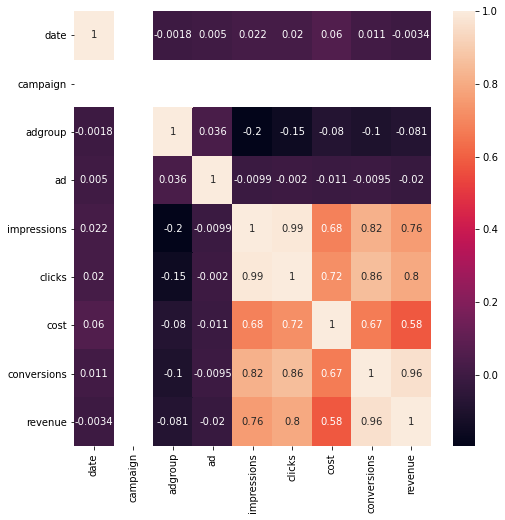

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2021-05-13 02:08:58,290 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...
Executing shutdown...


2021-05-13 02:09:01,087 - INFO     - Executing shutdown...


In [127]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (8,8))
sns.heatmap(df2.corr(), annot = True)

plt.show()

In [ ]:
#THe Campaign Feature can be removed as it does not have any corelation with other features
# No Corelation between dateadgroup,ad


# Corelationn on P2 i.e on test

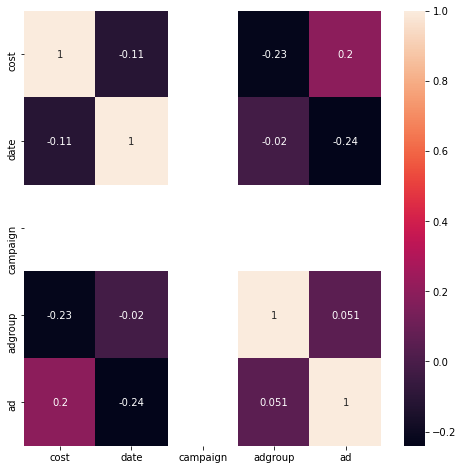

In [128]:
plt.figure(figsize = (8,8))
sns.heatmap(p2.corr(), annot = True)

plt.show()

In [129]:
#Campaign is 1 and can be removed i will not affects dataset

# training the model with linear regression 

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error 
x=df2.drop(['date','campaign','adgroup','ad','cost'],axis=1) 
y=df2['cost']


In [131]:
x

,impressions,clicks,conversions,revenue
0,24,6,0,0.00
1,1,0,0,0.00
2,13,4,0,0.00
3,5,4,0,0.00
4,247,126,4,925.71
...,...,...,...,...
4566,19,6,0,0.00
4567,1,0,0,0.00
4568,16,8,1,93.20
4569,37,13,0,0.00


In [132]:
y

0       0.08
1       0.00
2       0.04
3       0.08
4       1.29
        ... 
4566    0.07
4567    0.00
4568    0.12
4569    0.23
4570    0.14
Name: cost, Length: 4571, dtype: float64

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1) 
x_test

,impressions,clicks,conversions,revenue
3694,34,10,0,0.00
1856,12,4,0,0.00
2453,28,16,0,0.00
1653,41,14,0,0.00
1825,5,1,0,0.00
...,...,...,...,...
2520,41,19,0,0.00
2048,2,0,0,0.00
4,247,126,4,925.71
3460,13,6,0,0.00


In [135]:
L1=LinearRegression()
L1.fit(x_train,y_train)

LinearRegression()

In [137]:
print('slope',L1.coef_)
print('intercept',L1.intercept_)


slope [-0.07714106  0.2332569   2.45210856 -0.00960239]
intercept -1.1749991483773625


In [139]:
y_pred=L1.predict(x_test)
y_pred 

array([-1.4652263 , -1.16766431,  0.39716146, ..., 10.08093634,
       -0.77829158,  0.71856167])

In [140]:
print('MSE=',mean_squared_error(y_test,y_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('R2=',r2_score(y_test,y_pred))


MSE= 64.4186872220159
RMSE= 8.02612529319197
R2= 0.5222102464911207


# Polynomial Regression

In [143]:
from sklearn.preprocessing import PolynomialFeatures 
x=df2[['impressions','clicks']]
p=PolynomialFeatures(5) 
x_poly=p.fit_transform(x)


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)
x_test

array([[1.00000000e+00, 3.40000000e+01, 1.00000000e+01, ...,
        1.15600000e+06, 3.40000000e+05, 1.00000000e+05],
       [1.00000000e+00, 1.20000000e+01, 4.00000000e+00, ...,
        9.21600000e+03, 3.07200000e+03, 1.02400000e+03],
       [1.00000000e+00, 2.80000000e+01, 1.60000000e+01, ...,
        3.21126400e+06, 1.83500800e+06, 1.04857600e+06],
       ...,
       [1.00000000e+00, 2.47000000e+02, 1.26000000e+02, ...,
        1.22040939e+11, 6.22557019e+10, 3.17579694e+10],
       [1.00000000e+00, 1.30000000e+01, 6.00000000e+00, ...,
        3.65040000e+04, 1.68480000e+04, 7.77600000e+03],
       [1.00000000e+00, 4.50000000e+01, 2.30000000e+01, ...,
        2.46381750e+07, 1.25928450e+07, 6.43634300e+06]])

In [148]:
L1=LinearRegression()
L1.fit(x_train,y_train)
print('coefficient=',L1.coef_)
print('intercept=',L1.intercept_)


coefficient= [ 0.00000000e+00 -7.62958306e-03  6.41108327e-02  2.16836699e-03
 -9.24140702e-03  9.63765864e-03 -1.33964488e-05  5.52510465e-05
 -5.59606076e-05 -2.84794558e-07  4.02290665e-08 -2.00373541e-07
  3.08179744e-07 -1.24009726e-07 -2.86288255e-08  3.30591717e-11
 -4.62727835e-10  2.17997664e-09 -4.69230383e-09  4.77475031e-09
 -1.87250411e-09]
intercept= 0.08382705564452397


In [150]:
y_hat_poly=L1.predict(x_test) 
y_hat_poly

array([0.72149269, 0.26954442, 0.919863  , ..., 6.14260589, 0.36222624,
       1.15564991])

In [151]:
print('MSE=',mean_squared_error(y_test,y_hat_poly))

print('RMSE=',np.sqrt(mean_squared_error(y_test,y_hat_poly))) 

print('R2=',r2_score(y_test,y_hat_poly))


MSE= 71.90934032902165
RMSE= 8.479937519169681
R2= 0.46665249677663034


# Checking for Asuumptions:

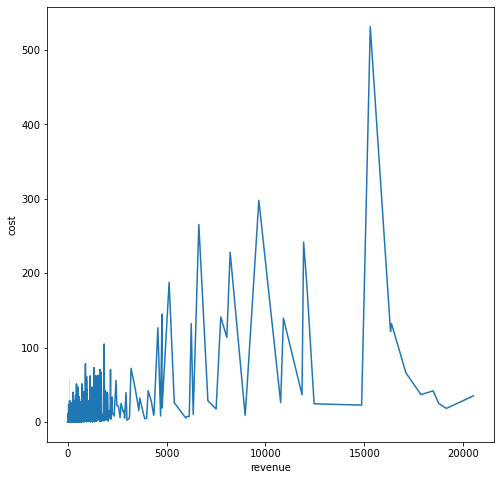

The dataset is Linear in nature


In [152]:
plt.figure(figsize=(8,8))
sns.lineplot(df2['revenue'],df2['cost']) 
plt.show()
print('The dataset is Linear in nature')


In [153]:
Linearity Accepted

SyntaxError: invalid syntax (<ipython-input-153-aacc5c7183c8>, line 1)

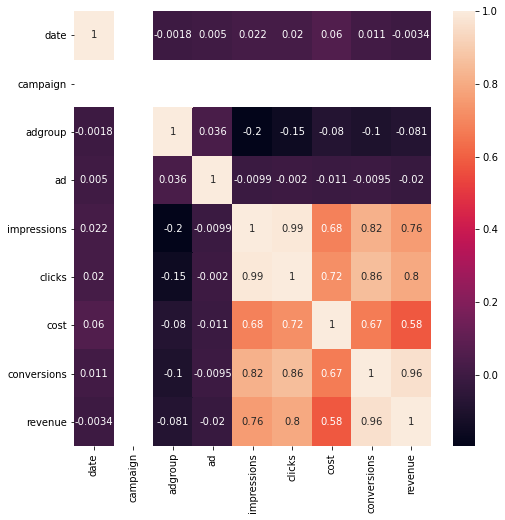

 Multi-collinearity is present 


In [157]:
#CHecking for Multicolinarity

plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(),annot=True) 
plt.show()
print(' Multi-collinearity is present ')

In [158]:
# Next Check for Residuals 
residual=y_test-y_pred
residual

3694    2.955226
1856    1.697664
2453   -0.107161
1653    2.412186
1825    1.617448
          ...   
2520    0.185902
2048    1.329281
4      -8.790936
3460    0.838292
1685    0.551438
Name: cost, Length: 1372, dtype: float64

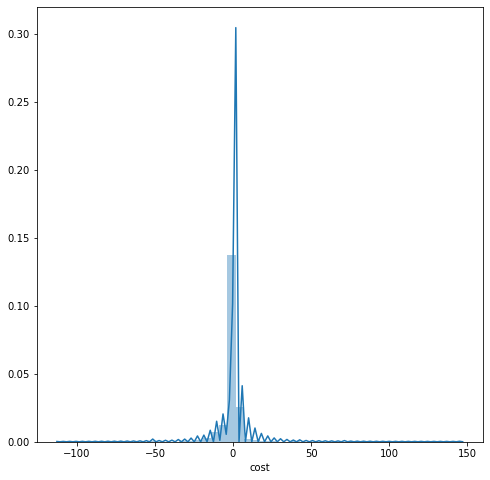

Skew= 2.200274323589126
 with postive skewenes Residuals is not normally distributed


In [159]:
plt.figure(figsize=(8,8)) 
sns.distplot(residual) 
plt.show()
print('Skew=',skew(residual))
print(' with postive skewenes Residuals is not normally distributed') 


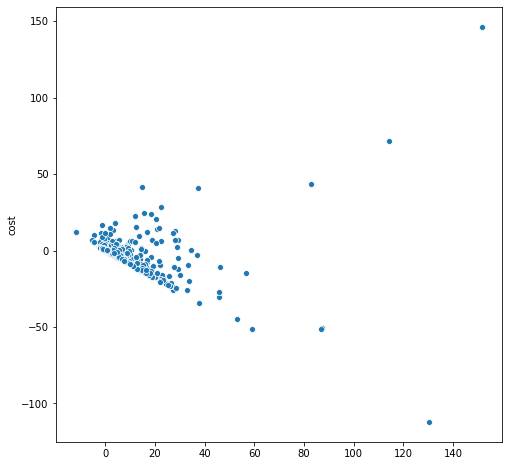

The graph is Heteroskedestical in nature hence not accepted


In [160]:
#check for  HOmoskedasity


plt.figure(figsize=(8,8))
sns.scatterplot(y_pred,residual) 
plt.show()
print('The graph is Heteroskedestical in nature hence not accepted')


# Since the assumptions are not accpeted  we cant get a proper prdiction with this dataset


In [164]:
#Predicting the required feature

a=np.array(df2['impressions'])
a1=a.reshape(-1,1)
b=np.array(df2['cost']) 
b1=b.reshape(-1,1)

a_test=np.array(p2['cost'])
a2=a_test.reshape(-1,1)
L1=LinearRegression() 
L1.fit(a1,b1)
print('slope=',L1.coef_)
print('intercept=',L1.intercept_) 
y_pred2=L1.predict(a2)
y_pred2



slope= [[0.04943929]]
intercept= [-1.77901163]


array([[-1.75033685],
       [-1.77060696],
       [-1.77653967],
       [-1.77851724],
       [-1.77851724],
       [-1.77752846],
       [-1.69644803],
       [-1.77901163],
       [-1.72660599],
       [-1.77505649],
       [-1.69793121],
       [-1.77060696],
       [-1.77406771],
       [-1.73550506],
       [-1.77802285],
       [-1.76417985],
       [-1.77110135],
       [-1.73056114],
       [-1.76813499],
       [-1.76714621],
       [-1.77901163],
       [-1.7468761 ],
       [-1.77802285],
       [-1.70139196],
       [-1.77901163],
       [-1.77802285],
       [-1.69743681],
       [-1.71177421],
       [-1.77653967],
       [-1.77901163],
       [-1.76714621],
       [-1.77555088],
       [-1.73006674],
       [-1.75626956],
       [-1.77258453],
       [-1.77703406],
       [-1.73253871],
       [-1.77307892],
       [-1.77901163],
       [-1.7745621 ],
       [-1.77505649],
       [-1.77011256],
       [-1.77901163],
       [-1.76220228],
       [-1.75923592],
       [-1

In [165]:

a=np.array(df2['clicks'])
a1=a.reshape(-1,1)
b=np.array(df2['cost']) 
b1=b.reshape(-1,1)

a_test=np.array(p2['cost'])
a2=a_test.reshape(-1,1)
L1=LinearRegression() 
L1.fit(a1,b1)
print('slope=',L1.coef_)
print('intercept=',L1.intercept_) 
y_pred3=L1.predict(a2)
y_pred3


slope= [[0.10322271]]
intercept= [-1.67292582]


array([[-1.61305665],
       [-1.65537796],
       [-1.66776469],
       [-1.6718936 ],
       [-1.6718936 ],
       [-1.66982914],
       [-1.5005439 ],
       [-1.67292582],
       [-1.56350975],
       [-1.66466801],
       [-1.50364058],
       [-1.65537796],
       [-1.66260355],
       [-1.58208984],
       [-1.67086137],
       [-1.64195901],
       [-1.65641019],
       [-1.57176757],
       [-1.65021683],
       [-1.64815237],
       [-1.67292582],
       [-1.60583106],
       [-1.67086137],
       [-1.51086617],
       [-1.67292582],
       [-1.67086137],
       [-1.50260835],
       [-1.53254294],
       [-1.66776469],
       [-1.67292582],
       [-1.64815237],
       [-1.66570023],
       [-1.57073534],
       [-1.62544338],
       [-1.65950687],
       [-1.66879692],
       [-1.57589648],
       [-1.6605391 ],
       [-1.67292582],
       [-1.66363578],
       [-1.66466801],
       [-1.65434574],
       [-1.67292582],
       [-1.6378301 ],
       [-1.63163674],
       [-1

In [166]:
a=np.array(df2['conversions'])
a1=a.reshape(-1,1)
b=np.array(df2['cost']) 
b1=b.reshape(-1,1)

a_test=np.array(p2['cost'])
a2=a_test.reshape(-1,1)
L1=LinearRegression() 
L1.fit(a1,b1)
print('slope=',L1.coef_)
print('intercept=',L1.intercept_) 
y_pred4=L1.predict(a2)
y_pred4

slope= [[1.84801921]]
intercept= [0.32616154]


array([[1.39801269],
       [0.64032481],
       [0.4185625 ],
       [0.34464174],
       [0.34464174],
       [0.38160212],
       [3.41235362],
       [0.32616154],
       [2.28506191],
       [0.47400308],
       [3.35691305],
       [0.64032481],
       [0.51096346],
       [1.95241845],
       [0.36312193],
       [0.88056731],
       [0.62184462],
       [2.13722037],
       [0.73272577],
       [0.76968615],
       [0.32616154],
       [1.52737403],
       [0.36312193],
       [3.2275517 ],
       [0.32616154],
       [0.36312193],
       [3.37539324],
       [2.83946767],
       [0.4185625 ],
       [0.32616154],
       [0.76968615],
       [0.45552289],
       [2.15570056],
       [1.17625038],
       [0.56640404],
       [0.40008231],
       [2.0632996 ],
       [0.54792385],
       [0.32616154],
       [0.49248327],
       [0.47400308],
       [0.658805  ],
       [0.32616154],
       [0.95448807],
       [1.06536923],
       [0.36312193],
       [0.4185625 ],
       [0.381

In [167]:
a=np.array(df2['revenue'])
a1=a.reshape(-1,1)
b=np.array(df2['cost']) 
b1=b.reshape(-1,1)

a_test=np.array(p2['cost'])
a2=a_test.reshape(-1,1)
L1=LinearRegression() 
L1.fit(a1,b1)
print('slope=',L1.coef_)
print('intercept=',L1.intercept_) 
y_pred5=L1.predict(a2)
y_pred5

slope= [[0.00765163]]
intercept= [1.02668677]


array([[1.03112471],
       [1.02798754],
       [1.02706935],
       [1.02676328],
       [1.02676328],
       [1.02691632],
       [1.03946498],
       [1.02668677],
       [1.03479749],
       [1.0272989 ],
       [1.03923543],
       [1.02798754],
       [1.02745193],
       [1.0334202 ],
       [1.0268398 ],
       [1.02898225],
       [1.02791103],
       [1.03418536],
       [1.02837012],
       [1.02852316],
       [1.02668677],
       [1.03166032],
       [1.0268398 ],
       [1.03869982],
       [1.02668677],
       [1.0268398 ],
       [1.03931195],
       [1.03709298],
       [1.02706935],
       [1.02668677],
       [1.02852316],
       [1.02722238],
       [1.03426188],
       [1.03020651],
       [1.02768148],
       [1.02699283],
       [1.0338793 ],
       [1.02760496],
       [1.02668677],
       [1.02737541],
       [1.0272989 ],
       [1.02806406],
       [1.02668677],
       [1.02928832],
       [1.02974742],
       [1.0268398 ],
       [1.02706935],
       [1.026

In [178]:
df2.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,0,24,6,0.08,0,0.00
1,2,0,1,0,1,0,0.00,0,0.00
2,2,0,2,0,13,4,0.04,0,0.00
3,2,0,3,0,5,4,0.08,0,0.00
4,2,0,0,11,247,126,1.29,4,925.71


In [176]:
dff=pd.DataFrame(columns=('date','cost','impressions','clicks','revenue','conversion'))

In [177]:
dff

,date,cost,impressions,clicks,revenue,conversion


In [179]:
dff['date']=p2['date']
dff['cost']=p2['cost']
dff['impressions']=y_pred2 
dff['clicks']=y_pred3 
dff['conversion']=y_pred4  
dff['revenue']=y_pred5


In [180]:
dff

,date,cost,impressions,clicks,revenue,conversion
0,0,0.58,-1.750337,-1.613057,1.031125,1.398013
1,0,0.17,-1.770607,-1.655378,1.027988,0.640325
2,0,0.05,-1.776540,-1.667765,1.027069,0.418563
3,0,0.01,-1.778517,-1.671894,1.026763,0.344642
4,0,0.01,-1.778517,-1.671894,1.026763,0.344642
...,...,...,...,...,...,...
313,14,0.01,-1.778517,-1.671894,1.026763,0.344642
314,14,0.01,-1.778517,-1.671894,1.026763,0.344642
315,14,0.14,-1.772090,-1.658475,1.027758,0.584884
316,14,0.06,-1.776045,-1.666732,1.027146,0.437043


In [181]:
csv=dff.to_csv(r'C:/Users/junaid/images\marketing.csv',index=False)

In [184]:
sample_df=pd.read_csv(r'C:/Users/junaid/images\marketing.csv')

In [186]:
sample_df.head()

,date,cost,impressions,clicks,revenue,conversion
0,0,0.58,-1.750337,-1.613057,1.031125,1.398013
1,0,0.17,-1.770607,-1.655378,1.027988,0.640325
2,0,0.05,-1.776540,-1.667765,1.027069,0.418563
3,0,0.01,-1.778517,-1.671894,1.026763,0.344642
4,0,0.01,-1.778517,-1.671894,1.026763,0.344642
